In [5]:
# Import Electricity Map utilities
from utils import *

# Enable inline plotting
%matplotlib inline 
import matplotlib.pyplot as plt

In [17]:
df = get_state(['BE', 'DK', 'FR', 'HU'], '2016-12-01', '2017-02-13', 60)

In [18]:
df['hourofday'] = df['timestamp'].apply(lambda x: arrow.get(x).floor('hour').format('HH'))
df.head()

,co2intensity,country,timestamp,hourofday
0,263.126267,DK,2016-12-01 00:00:00+00:00,00
0,119.098296,FR,2016-12-01 00:00:00+00:00,00
0,267.982124,DK,2016-12-01 01:00:00+00:00,01
0,119.164527,FR,2016-12-01 01:00:00+00:00,01
0,244.418753,DK,2016-12-01 02:00:00+00:00,02


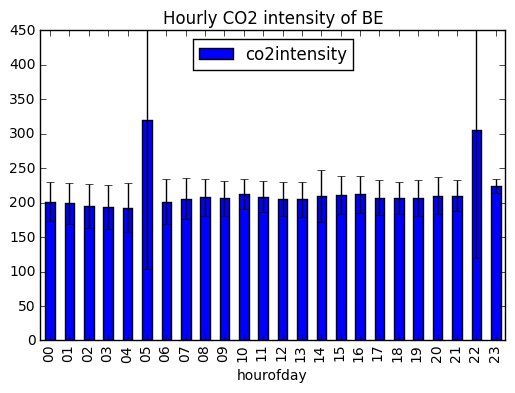

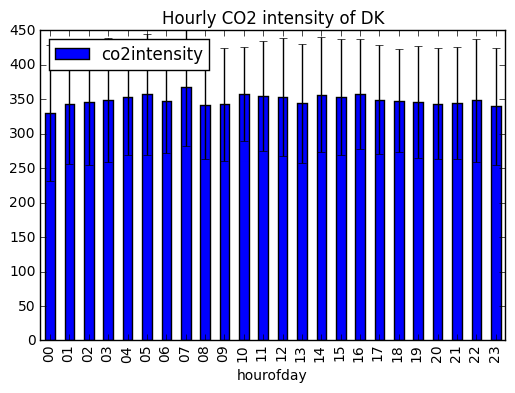

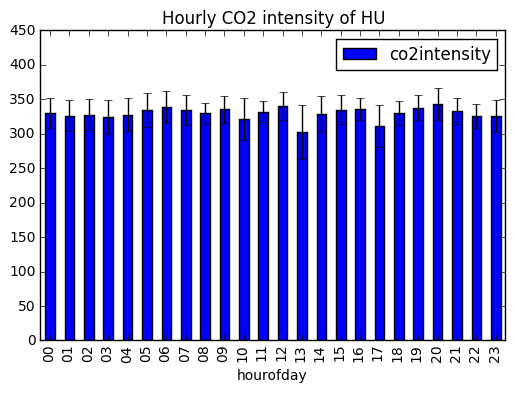

In [19]:
for ctr in ['BE', 'DK', 'HU']:
    means = df[df['country'] == ctr].groupby(['hourofday']).mean()
    errs = df[df['country'] == ctr].groupby(['hourofday']).std()
    means.plot.bar(yerr=errs)
    ax = plt.gca()
    ax.set_ylim([0, 450])
    ax.set_title('Hourly CO2 intensity of %s' % ctr)